# GeoBench BioMassters

In [1]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchBioMasstersDataModule
from geobench_v2.datasets import GeoBenchBioMassters
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
    visualize_segmentation_target_statistics,
)

# %load_ext autoreload
# %autoreload 2

In [ ]:
PROJECT_ROOT = Path("../../")

In [ ]:
band_order = GeoBenchBioMassters.band_default_order

datamodule = GeoBenchBioMasstersDataModule(
    img_size=256,
    batch_size=8,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "biomassters",
    band_order=band_order,
    num_time_steps=2,
    data_normalizer=torch.nn.Identity(),  # we do custom normalization in the tutorial
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


### Raw Image Statistics

Computed over the training dataset.

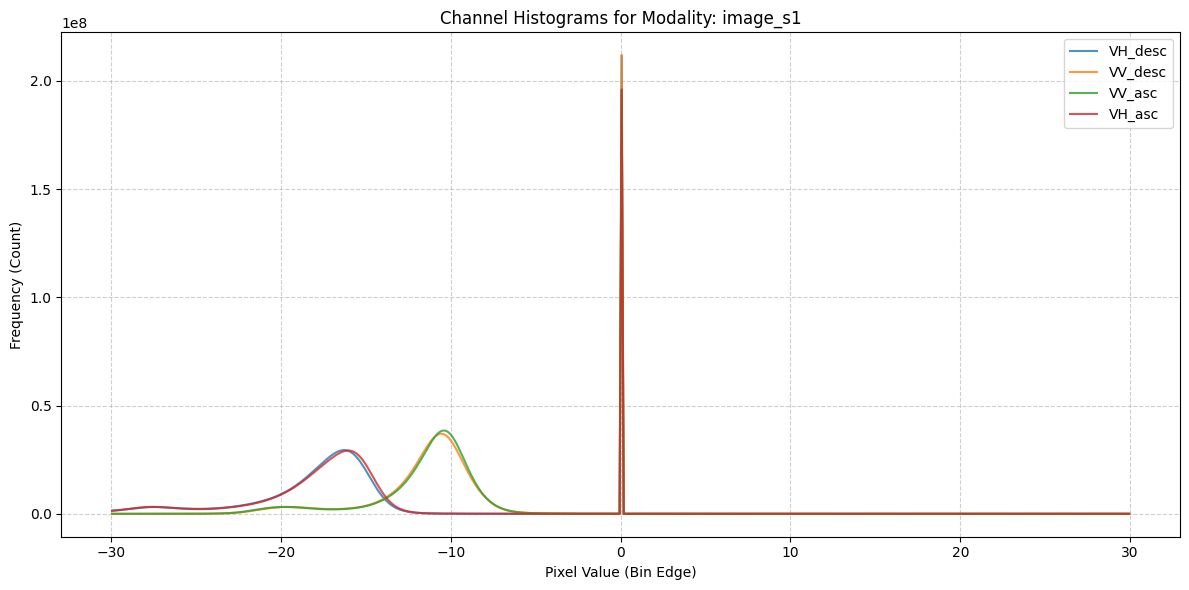

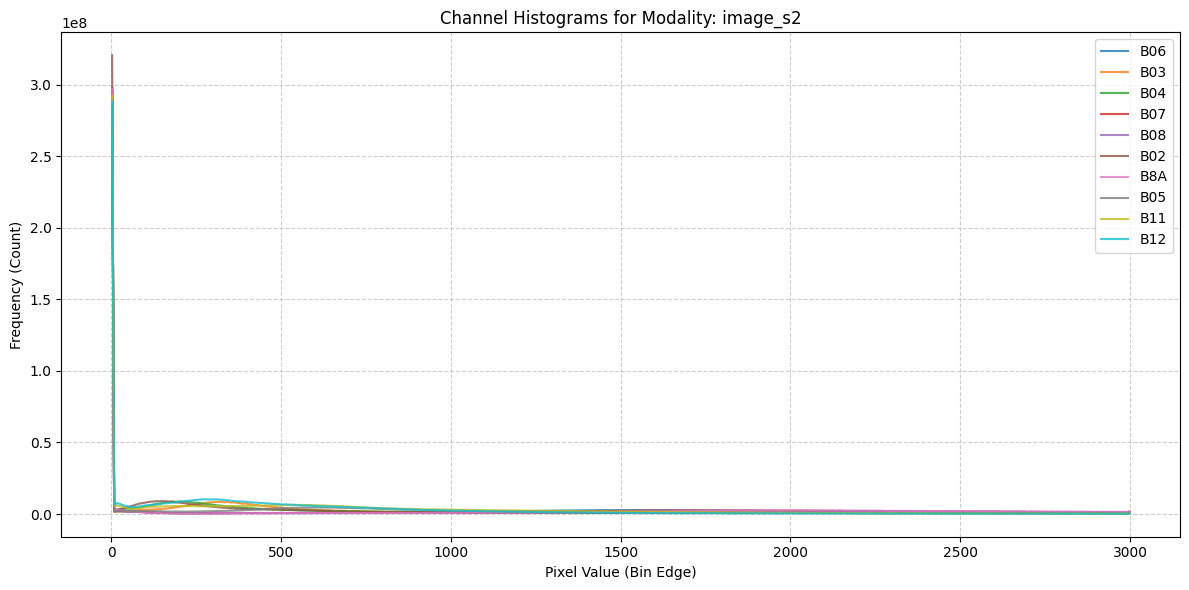

In [ ]:
fig = plot_channel_histograms(
    PROJECT_ROOT / "data" / "biomassters" / "biomassters_stats_satmae.json"
)

## Target Statistics

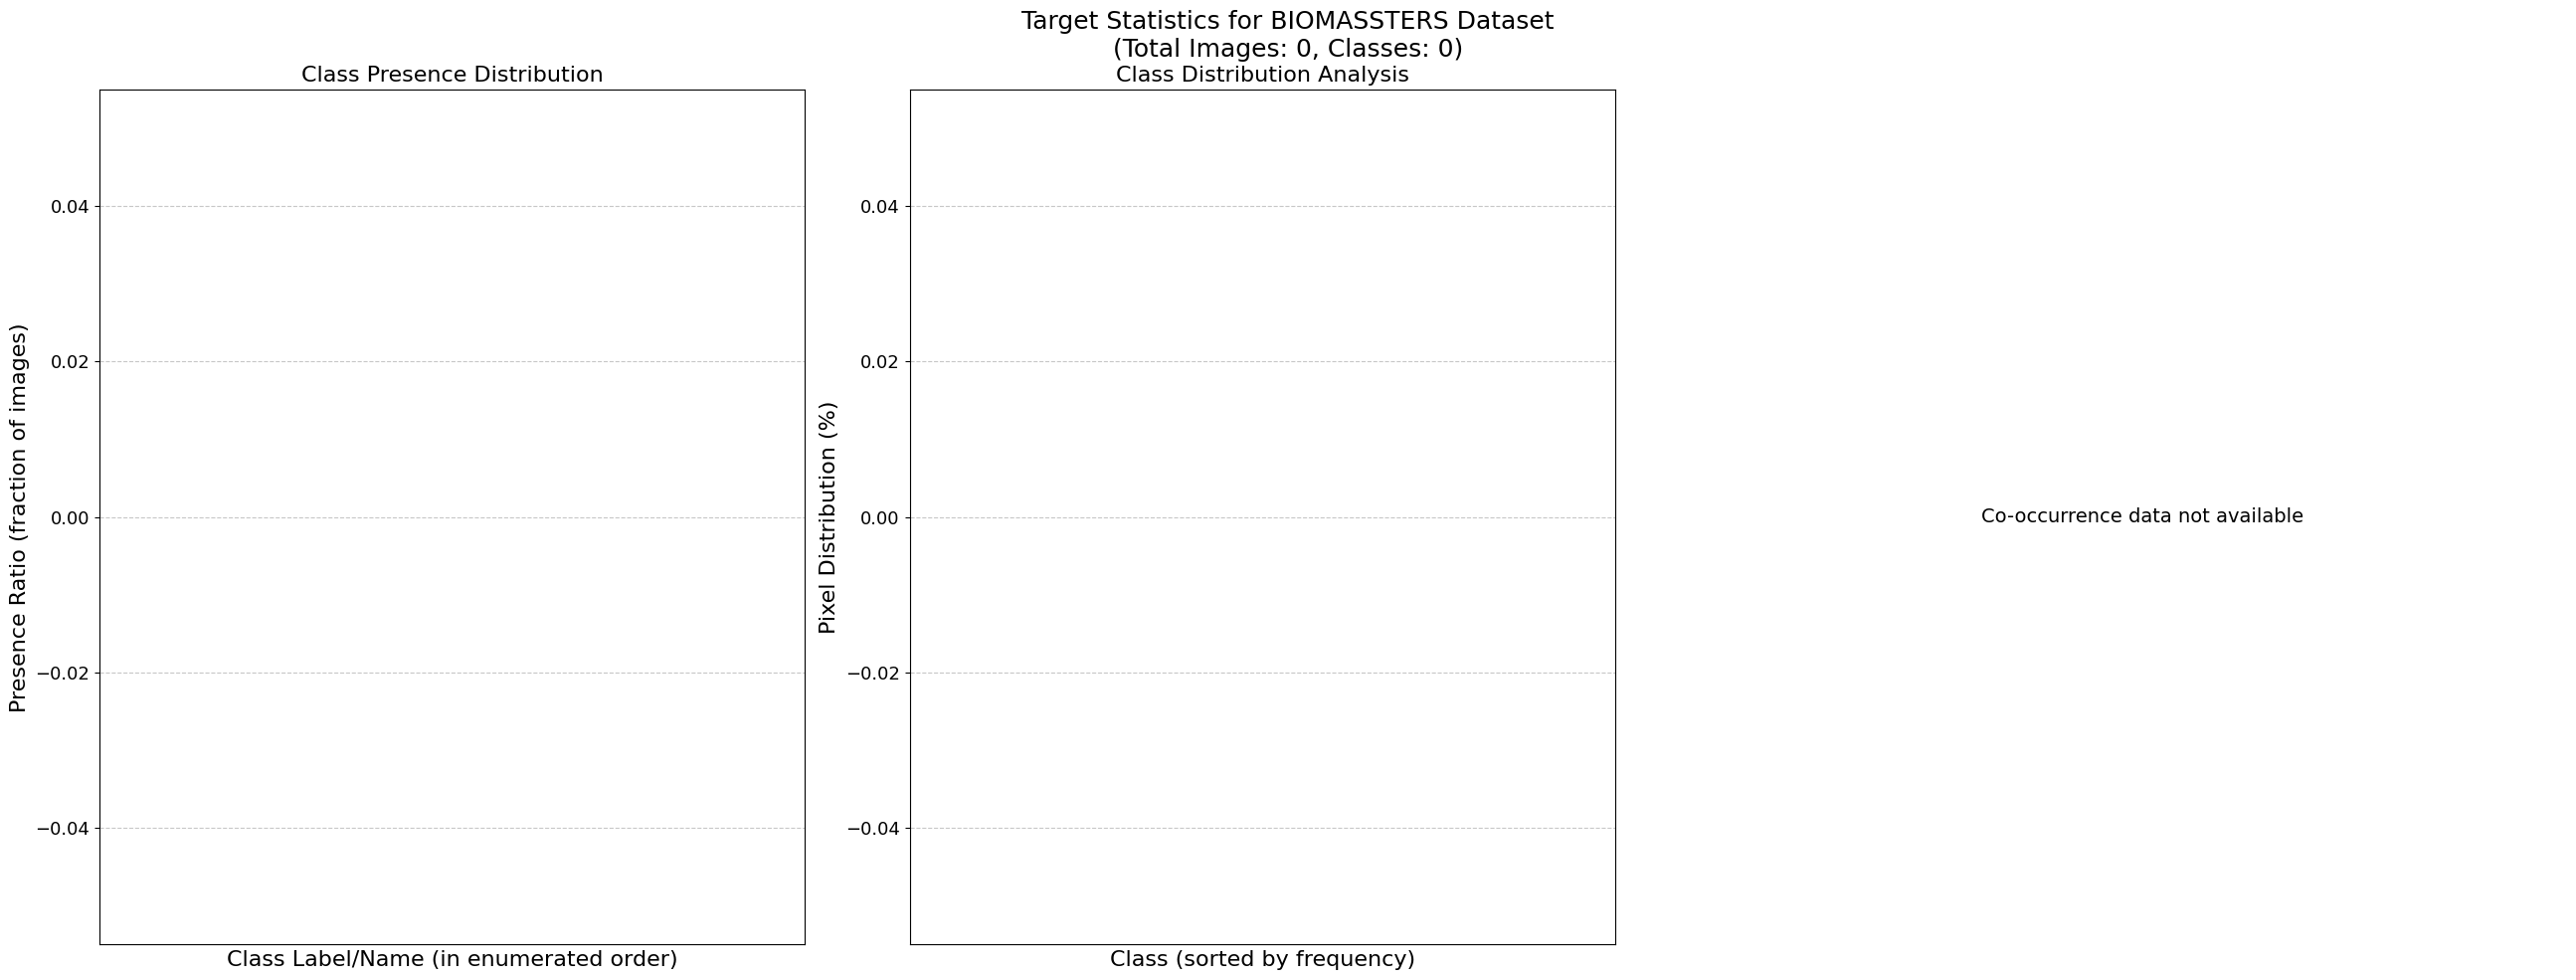

In [ ]:
fig = visualize_segmentation_target_statistics(
    PROJECT_ROOT / "data" / "biomassters" / "biomassters_stats_satmae.json",
    "BioMassters",
)

### Raw Batch Statistics

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

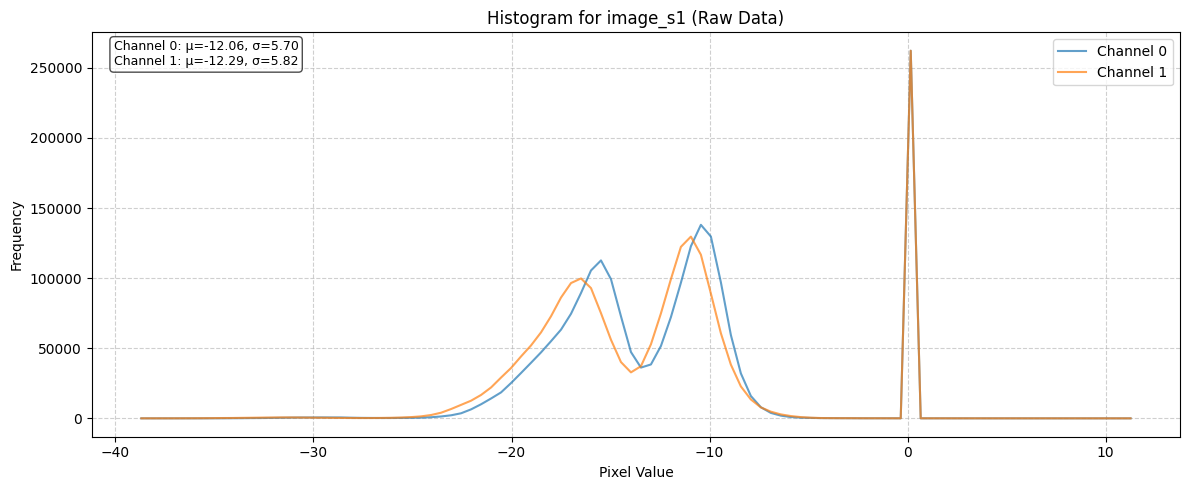

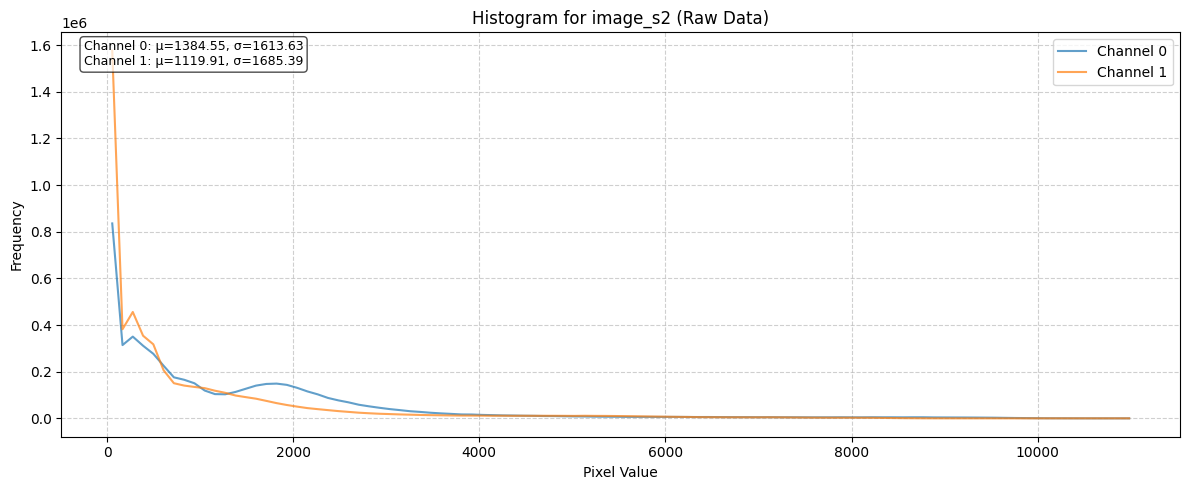

In [6]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

### Effect of Normalization Schemes

In [ ]:
direct_stats_path = os.path.join(
    PROJECT_ROOT, "data", "biomassters", "biomassters_stats_clip_rescale.json"
)
satmae_stats_path = os.path.join(
    PROJECT_ROOT, "data", "biomassters", "biomassters_stats_satmae.json"
)


clip_z_normalizer = ZScoreNormalizer(direct_stats_path, band_order)
satmae_normalizer = SatMAENormalizer(satmae_stats_path, band_order)

### Effect of SatMAE Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

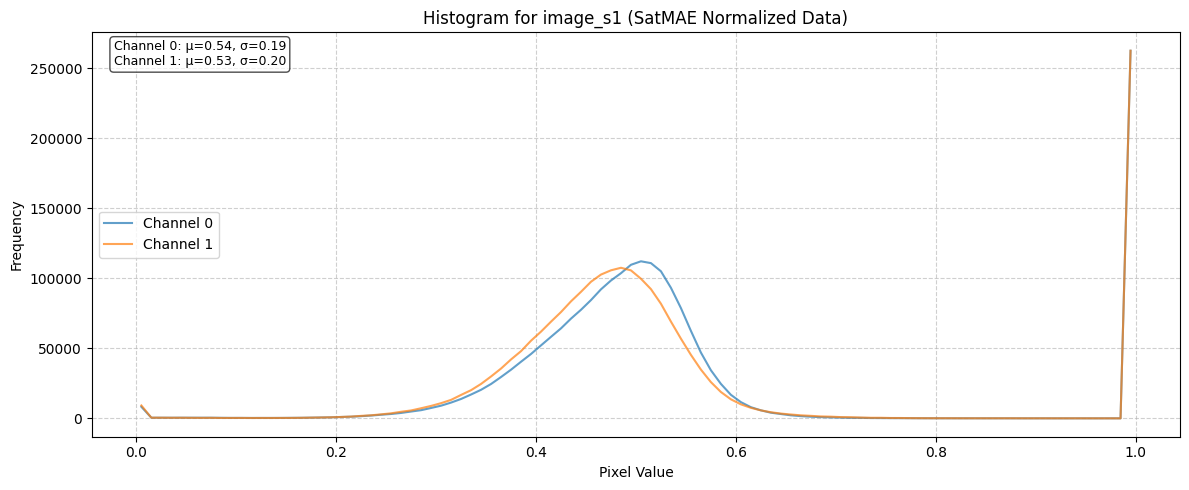

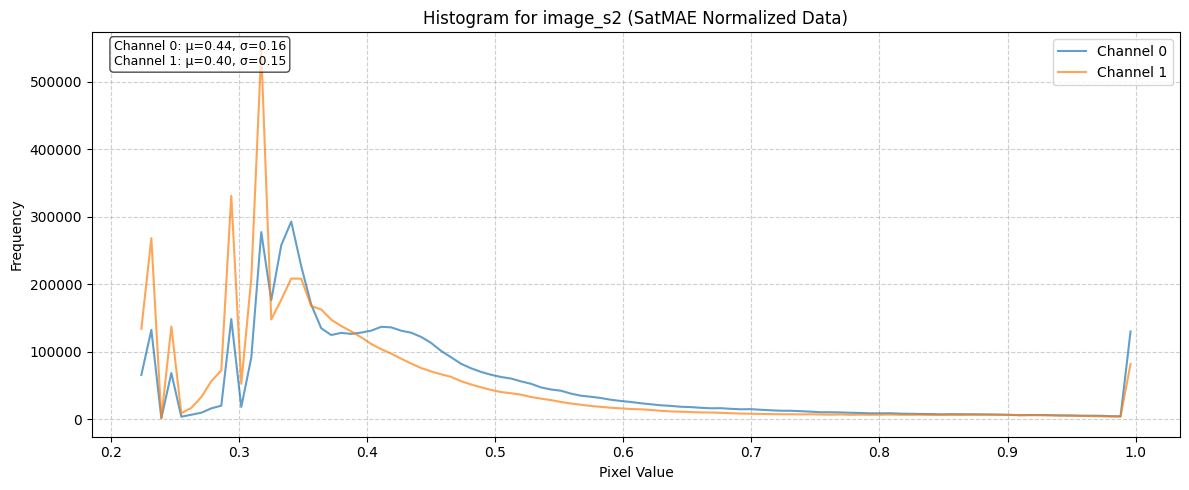

In [8]:
satmae_normalized_batch = satmae_normalizer(raw_batch)
satmae_batch_stats = compute_batch_histograms(satmae_normalized_batch, n_bins=100)
sat_mae_norm_fig = plot_batch_histograms(
    satmae_batch_stats, band_order, title_suffix=" (SatMAE Normalized Data)"
)
sat_mae_norm_fig

### Effect of ClipZ Normalization scheme on batch

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

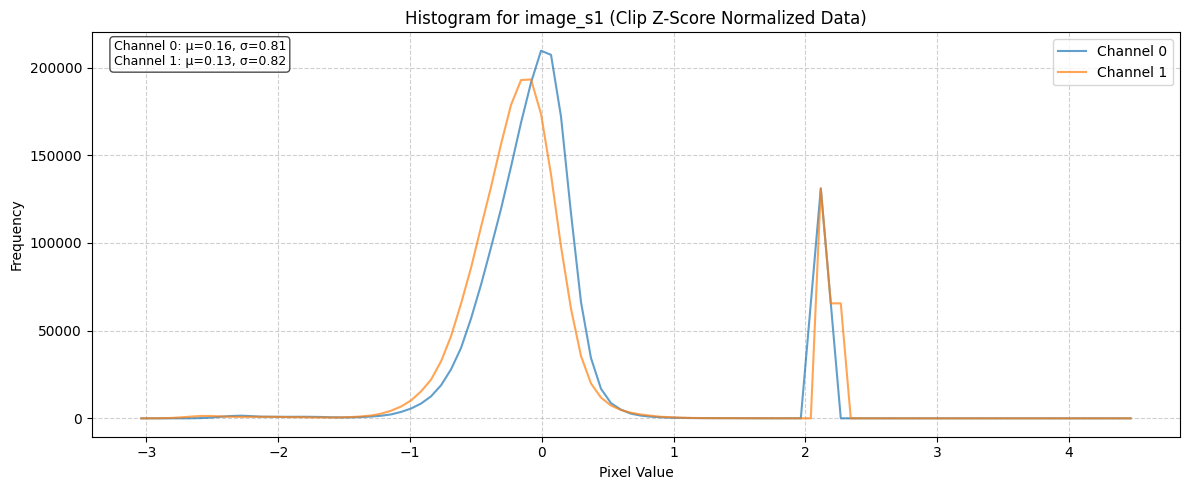

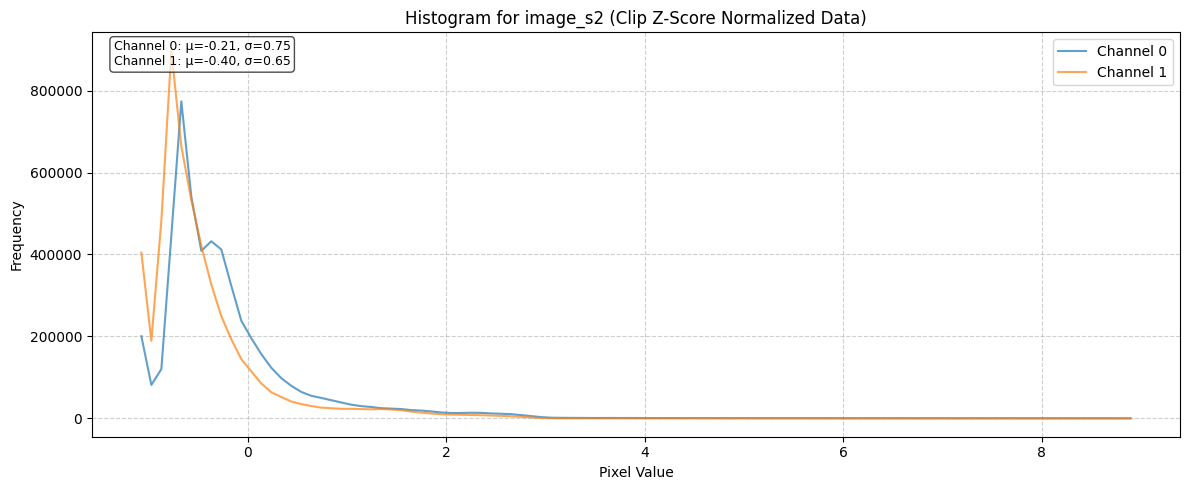

In [9]:
clip_z_normalized_batch = clip_z_normalizer(raw_batch)
clip_z_batch_stats = compute_batch_histograms(clip_z_normalized_batch, n_bins=100)
clip_z_norm_fig = plot_batch_histograms(
    clip_z_batch_stats, band_order, title_suffix=" (Clip Z-Score Normalized Data)"
)
clip_z_norm_fig

## Visualize Batch Data

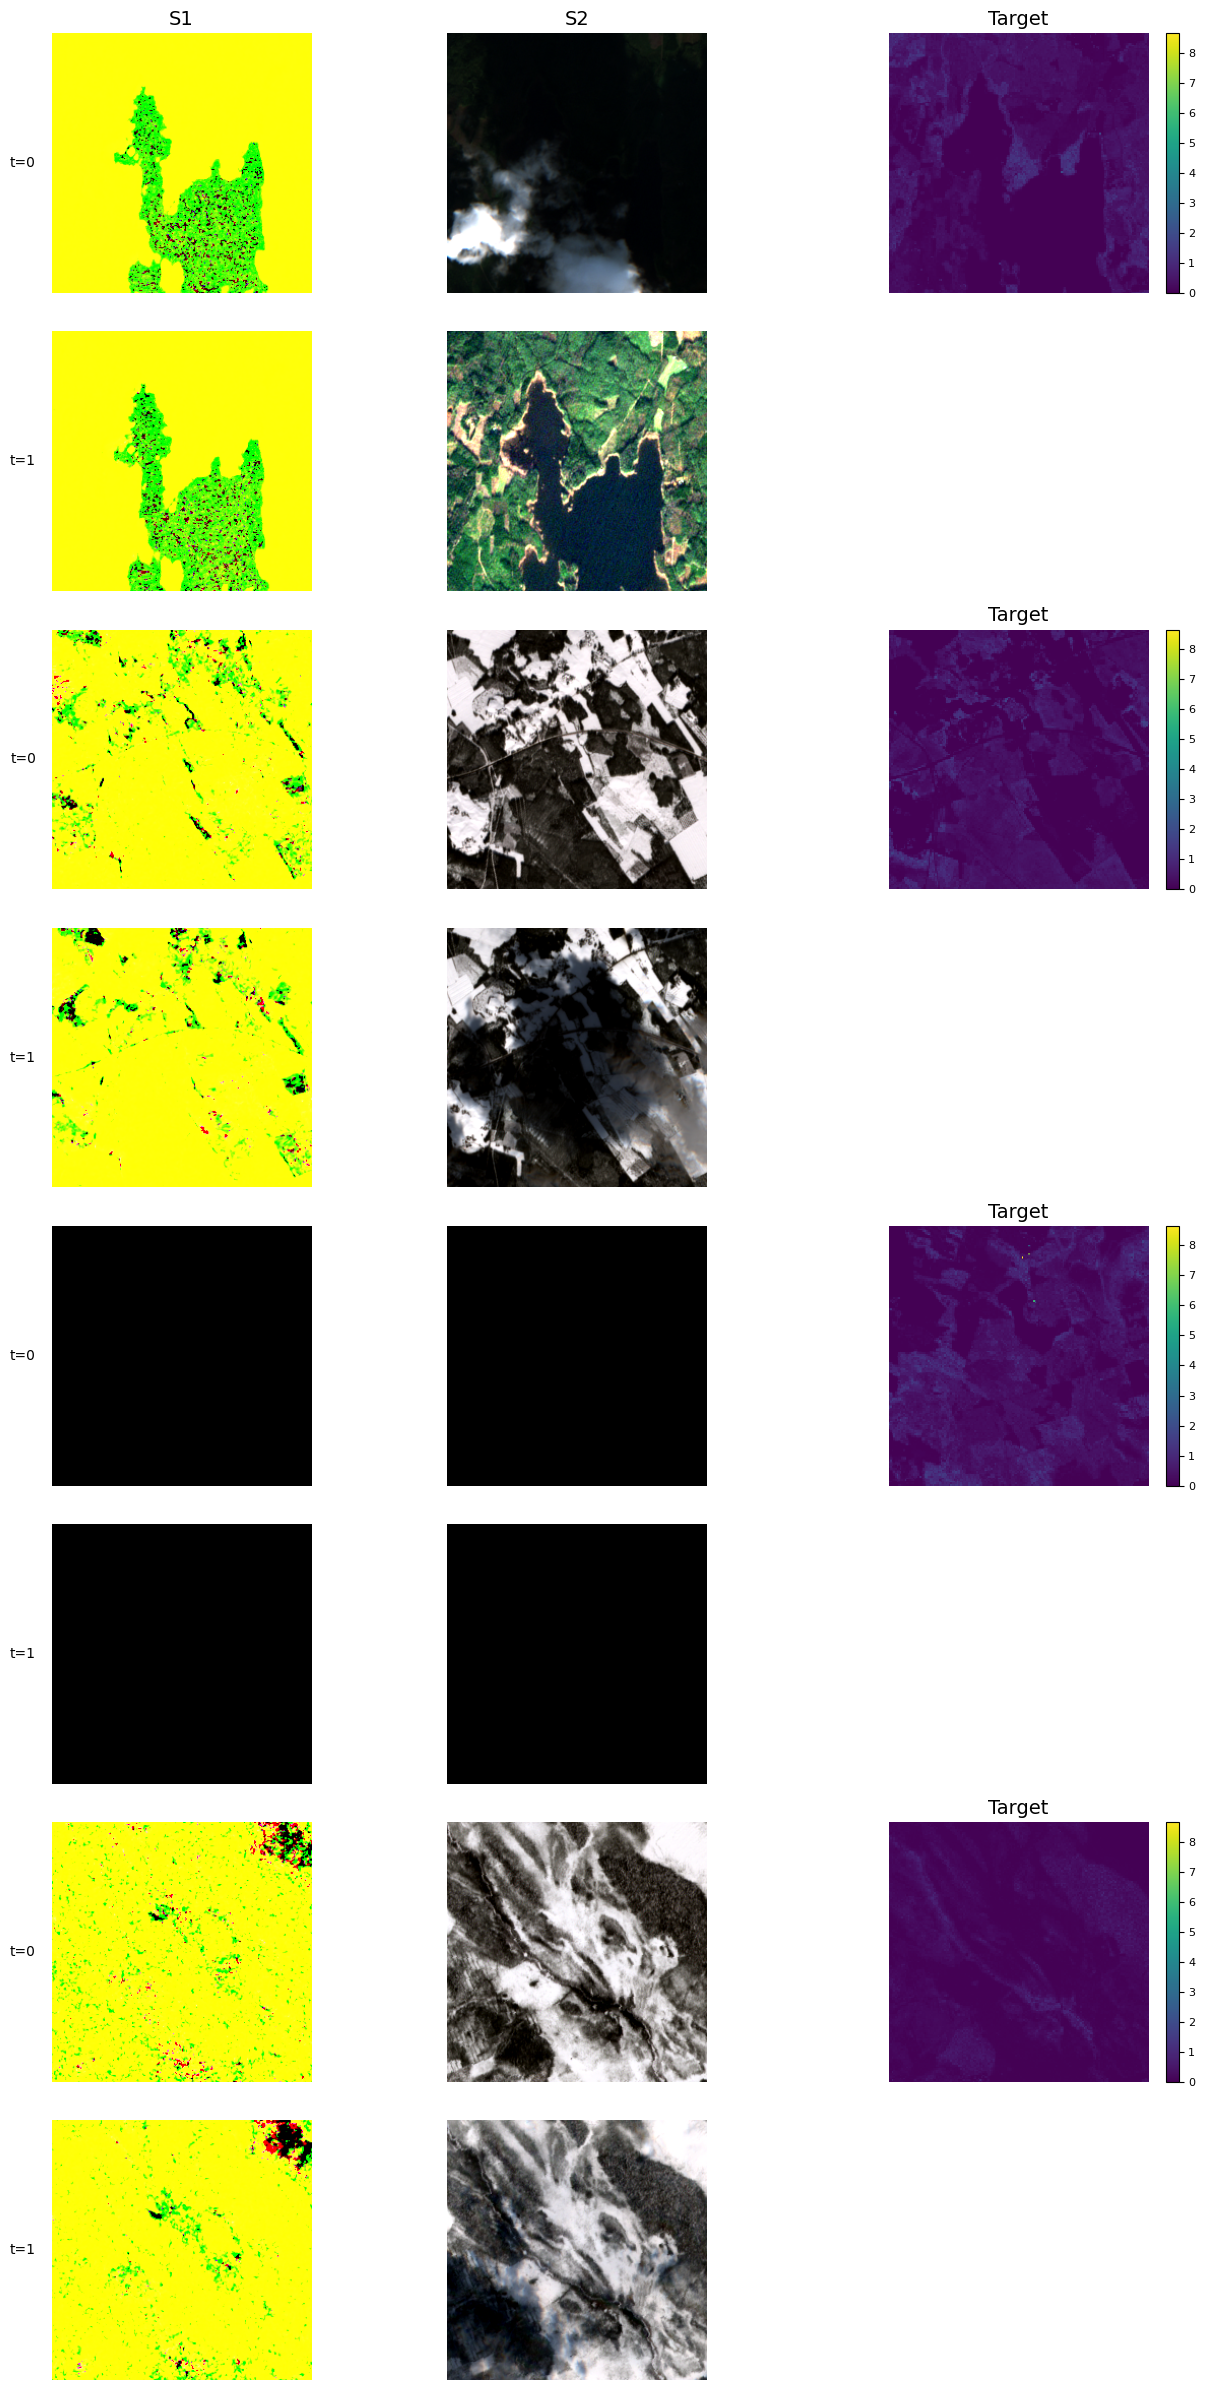

In [21]:
fig, batch = datamodule.visualize_batch()

In [ ]:
for i in batch["image_s1"]:
    print(i.max())

tensor(5.4691)
tensor(-4.8509)
tensor(2.2177)
tensor(3.5383)
tensor(9.7002)
tensor(0.)
tensor(4.7663)
tensor(-4.4279)
